### Step 1. 필요한 라이브러리 임포트

In [57]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) 확인

### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 drinks 저장해주세요**  
data : drinks.csv

In [58]:
drinks = pd.read_csv('drinks.csv',sep=',')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. 어느 대륙(continent)이 평균 맥주 소모량이 가장 높은가요?

EU

In [33]:
continent_beer_mean = drinks.groupby('continent')['beer_servings'].mean()
continent_beer_mean[continent_beer_mean == continent_beer_mean.max()]  #

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [55]:
# 
continent_beer_mean[continent_beer_mean == continent_beer_mean.max()].index[0]

'EU'

### Step 5. 각 대륙(continent)별 와인 소모 통계값 계산해주세요

count, mean,std, min, max값은 'describe'를 통해 한번에 조회할 수 있습니다

groupby후 describe를 적용해보세요

In [34]:
continent_wine_des = drinks.groupby('continent')['wine_servings'].describe()
continent_wine_des

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. 평균 알코올 소비량을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 평균값을 구해주세요

In [39]:
# drinks['alcohol_servings'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']

# # continent_alcohol_mean = drinks.groupby('continent')['alcohol_servings'].mean()
# continent_alcohol_mean

In [56]:
# continent_alcohol_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# continent_alcohol_mean

In [40]:
##
continent_alcohol_mean = drinks.groupby('continent')[
    'beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'].mean()
continent_alcohol_mean

C:\Users\admin\AppData\Local\Temp\ipykernel_3336\918171044.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  continent_alcohol_mean = drinks.groupby('continent')[


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. 알코올 소비량 중간값을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 중간값을 구해주세요

중간값은 .median()으로 구합니다

In [41]:
continent_alcohol_mean = drinks.groupby('continent')[
    'beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'].median()
continent_alcohol_mean

C:\Users\admin\AppData\Local\Temp\ipykernel_3336\3814742816.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  continent_alcohol_mean = drinks.groupby('continent')[


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. 증류주(spirit) 소비량의 평균, 최소, 최대값을 구해주세요

Hint: groupby와 agg 함수를 사용하여 한번에 표현해주세요

In [44]:
spirit_agg = drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max'])
spirit_agg

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


### Step 9. 대륙별 맥주 소비량의 평균을 Bar 그래프로 표현해주세요

<AxesSubplot:xlabel='continent'>

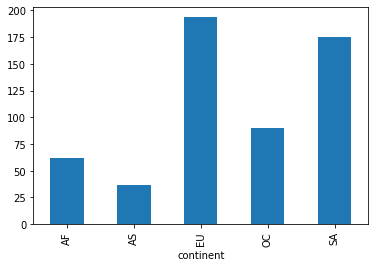

In [59]:
#
drinks.groupby('continent')['beer_servings'].mean().plot(kind='bar')

In [47]:
continent_beer_mean = drinks.groupby('continent')['beer_servings'].mean()
continent_beer_mean

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

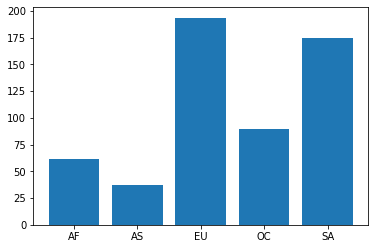

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

continent = ['AF','AS','EU','OC','SA']

plt.bar(range(len(continent_beer_mean)), continent_beer_mean)
plt.xticks(range(len(continent_beer_mean)), continent)
plt.show()